# with PV 데이터

In [1]:
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate


In [2]:
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# DataFrame의 값 Line Chart 그리기
def plotData(df, columns = None, legend=None, type=None, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'], 
             title=None, ylabel='Load', xlabel='Date-Hour', ylim=None, figsize=(11,3), saveto=None):
    fig = plt.figure(figsize=figsize)
    if ylim != None :
        plt.ylim(ylim[0], ylim[1])
        
    for i, col in enumerate(columns) :
        plt.plot(df[col], linewidth=1, color=color[i])
        
    # plt.grid(True, color='#f2f5f3', linestyle='-', linewidth=1)
    plt.grid(True, axis='y', color='#f2f5f3', alpha=0.5, linestyle='--')
    plt.grid(True, axis='x', color='#f2f5f3', alpha=0.5, linestyle='--')
    if title != None :
        plt.title(title, fontsize=14)
    plt.ylabel(ylabel, fontsize=12, labelpad=13) ; 
    plt.xlabel(xlabel, fontsize=12, labelpad=8)
    if legend == None :
        legend = columns
    _legend = plt.legend(legend, prop={'size': 13})
    _legend.get_frame().set_alpha(None)
    _legend.get_frame().set_facecolor((0, 0, 1, 0.1))
    plt.autoscale(enable=True, axis='x', tight=True)
    #     plt.axhline(y=10.0, color='r', linewidth=2)
    # plt.axhline(y=9.8, linewidth=2, color='#ff0000')
    #     plt.axvline(x=datetime(2019, 1, 1), color='r', linestyle=':', linewidth=1)
    if saveto != None :
        #plt.close(fig)
        plt.savefig(saveto)
    else :
        plt.show()

# plotData(df_day, columns=['diff1', 'pre1', 'pred1'], 
#          ylabel='Load', xlabel='Date-Hour', ylim=None, figsize=(11,3))

In [3]:
import pandas as pd
import numpy as np

## Raw 데이터 Loading 및 분석

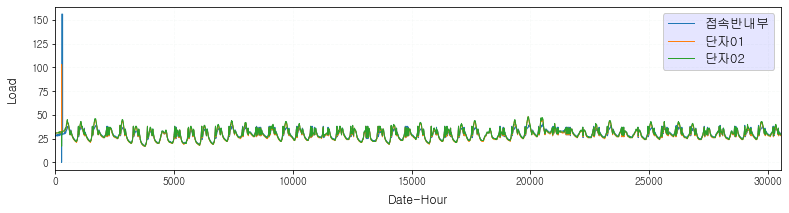

,일자,평균전압,전체전류,외기온도,모듈온도,일사량,V01,V02,V03,V04,C01,C02,C03,C04,접속반내부,단자01,단자02,단자03,단자04
0,2021-04-09 09:53:00,542,36.5,24.5,30.3,691.0,521,536,539,542,7.6,5.6,7.8,7.8,28,30,30,30,30
1,2021-04-09 09:55:00,532,37.1,25.2,31.3,700.5,513,527,529,532,7.8,5.7,7.9,7.9,28,30,30,30,30
2,2021-04-09 09:56:00,545,36.1,25.4,30.9,703.3,526,540,543,545,7.6,5.5,7.7,7.7,27,30,30,30,30
3,2021-04-09 10:03:00,522,39.6,0.0,0.0,0.0,506,518,520,522,8.1,6.1,8.5,8.5,28,30,30,30,30
4,2021-04-09 10:05:00,527,39.2,25.4,30.7,739.1,507,522,524,527,8.1,6.0,8.4,8.4,28,30,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30554,2021-05-31 23:50:00,0,0.8,22.2,12.8,0.0,0,0,0,0,0.0,0.0,0.0,0.1,29,28,29,29,29
30555,2021-05-31 23:52:00,0,0.6,22.2,13.0,0.0,0,0,0,0,0.0,0.0,0.0,0.1,29,28,29,29,29
30556,2021-05-31 23:55:00,0,0.9,22.2,13.2,0.0,0,0,0,0,0.0,0.0,0.0,0.1,29,28,29,29,29
30557,2021-05-31 23:57:00,0,0.8,22.4,13.4,0.0,0,0,0,0,0.0,0.0,0.0,0.1,29,28,29,29,29


In [4]:
# Load CSV using Pandas from File
filename ='raw.csv'
df0 = pd.read_csv(filename, encoding='euckr')
df0['일자'] = pd.to_datetime(df0['일자'])
plotData(df0, columns=['접속반내부', '단자01', '단자02'], ylabel='Load', xlabel='Date-Hour', ylim=None, figsize=(13,3))
df0

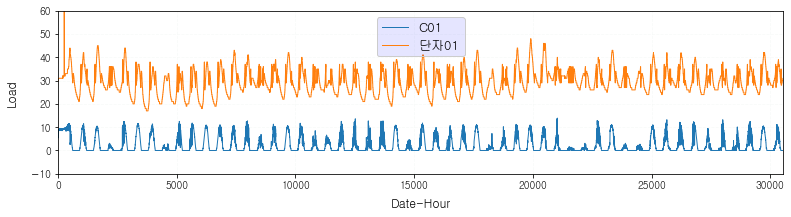

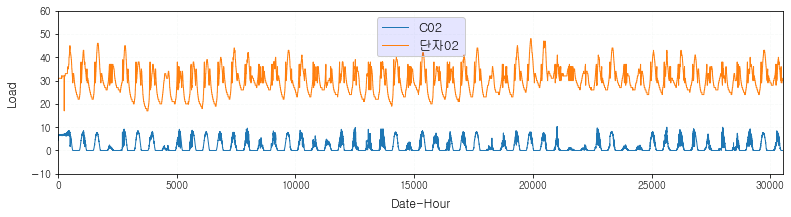

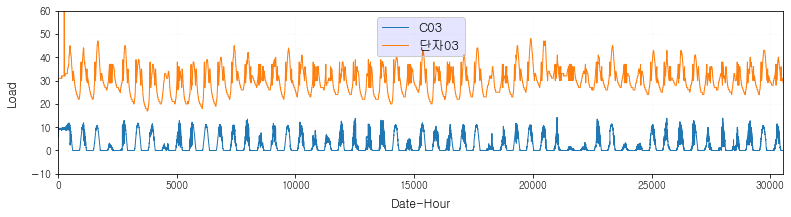

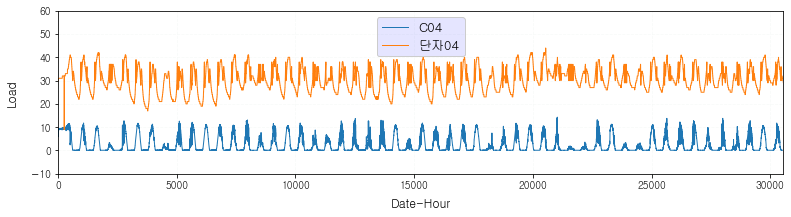

In [5]:
plotData(df0, columns=['C01', '단자01'], ylabel='Load', xlabel='Date-Hour', ylim=(-10, 60), figsize=(13,3))
plotData(df0, columns=['C02', '단자02'], ylabel='Load', xlabel='Date-Hour', ylim=(-10, 60), figsize=(13,3))
plotData(df0, columns=['C03', '단자03'], ylabel='Load', xlabel='Date-Hour', ylim=(-10, 60), figsize=(13,3))
plotData(df0, columns=['C04', '단자04'], ylabel='Load', xlabel='Date-Hour', ylim=(-10, 60), figsize=(13,3))


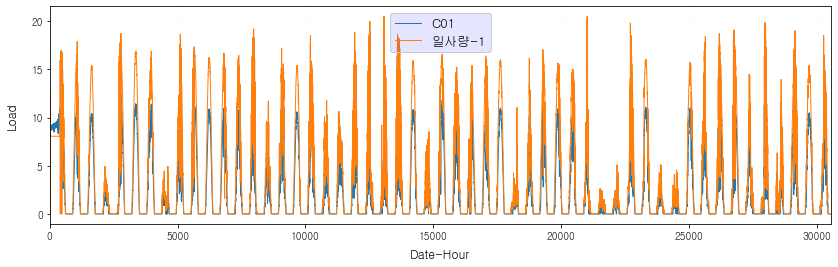

In [6]:
df0['일사량-1'] = df0['일사량'] / 60
plotData(df0, columns=['C01', '일사량-1'], ylabel='Load', xlabel='Date-Hour', figsize=(14,4))


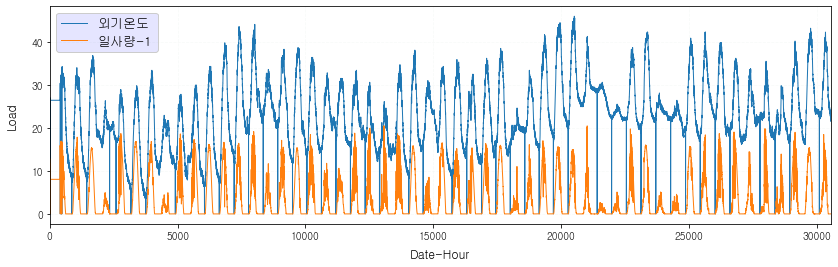

In [7]:
plotData(df0, columns=['외기온도', '일사량-1'], ylabel='Load', xlabel='Date-Hour', figsize=(14,4))

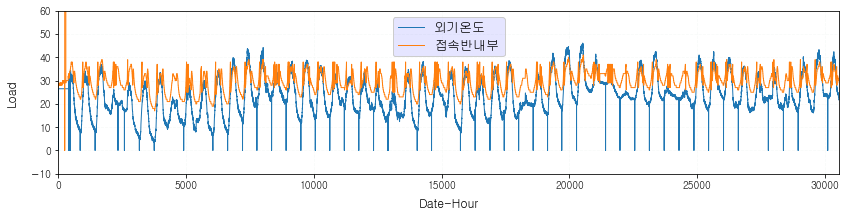

In [8]:
plotData(df0, columns=['외기온도', '접속반내부'], ylabel='Load', xlabel='Date-Hour', ylim=(-10, 60), figsize=(14,3))

In [9]:
df = df0.copy()
df = df[['일자', '외기온도', '모듈온도', '일사량', '접속반내부', '단자01', '단자02', '단자03', '단자04', '전체전류' ]]
df.head(5)

,일자,외기온도,모듈온도,일사량,접속반내부,단자01,단자02,단자03,단자04,전체전류
0,2021-04-09 09:53:00,24.5,30.3,691.0,28,30,30,30,30,36.5
1,2021-04-09 09:55:00,25.2,31.3,700.5,28,30,30,30,30,37.1
2,2021-04-09 09:56:00,25.4,30.9,703.3,27,30,30,30,30,36.1
3,2021-04-09 10:03:00,0.0,0.0,0.0,28,30,30,30,30,39.6
4,2021-04-09 10:05:00,25.4,30.7,739.1,28,30,30,30,30,39.2


## 전처리

### - 이상 데이터 Filtering

In [10]:
#-------------------------------------------------------------------------- 이상 데이터 Filtering
df['단자01'] = np.where(df['단자01'] > 100, np.nan, df['단자01'])
df['단자01'] = np.where(df['단자01'] < 5,   np.nan, df['단자01'])
df['단자02'] = np.where(df['단자02'] > 100, np.nan, df['단자02'])
df['단자02'] = np.where(df['단자02'] < 5,   np.nan, df['단자02'])
df['외기온도'] = np.where(df['외기온도'] > 100, np.nan, df['외기온도'])
df['접속반내부'] = np.where(df['접속반내부'] > 100, np.nan, df['접속반내부'])
df['외기온도'] = np.where((df['외기온도'] == 0) & (df['모듈온도'] == 0) & (df['일사량'] == 0) , np.nan, df['외기온도'])
# df.isnull().sum()

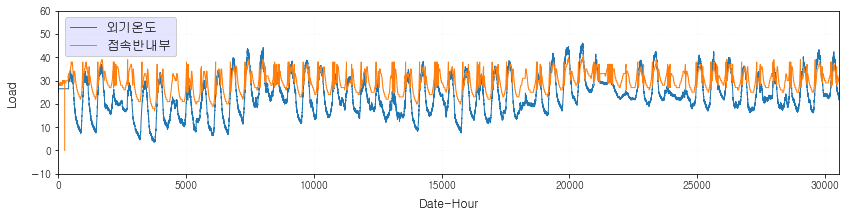

In [11]:
plotData(df, columns=['외기온도', '접속반내부'], ylabel='Load', xlabel='Date-Hour', ylim=(-10, 60), figsize=(14,3))

### - NaN 데이터 삭제

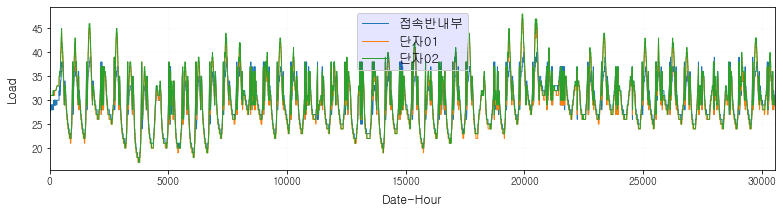

In [12]:
# NaN 데이터 삭제
df.dropna(inplace=True)
df.isnull().sum()
plotData(df, columns=['접속반내부', '단자01', '단자02'], ylabel='Load', xlabel='Date-Hour', ylim=None, figsize=(13,3))

### - 중복 데이터 제거

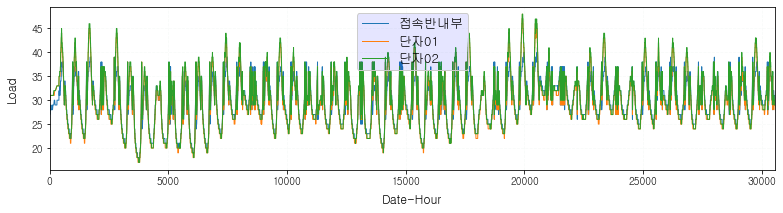

In [13]:
# 중복 데이터 제거 ---- 일자 기준
df.drop_duplicates(subset=['일자'], inplace=True)
plotData(df, columns=['접속반내부', '단자01', '단자02'], ylabel='Load', xlabel='Date-Hour', ylim=None, figsize=(13,3))

### - 누락된 시간 데이터 채우기 <-- Resample()

In [ ]:
# Index 설정
df.set_index('일자', inplace=True)
# plotData(df, columns=['접속반내부', '단자01', '단자02'], ylabel='Load', xlabel='Date-Hour', ylim=None, figsize=(13,3))

In [ ]:
# 비어있는 시각 데이터 채우기
df = df.resample('T').ffill()  # 2min
# df1.head(20)
plotData(df, columns=['접속반내부', '단자01', '단자02', '단자03', '단자04'], ylabel='Load', xlabel='Date-Hour', ylim=None, figsize=(13,3))
# df.isnull().sum()


### - NaN 값 채우기

In [ ]:
# NaN 값 채우기
# print(df.isnull().sum())
df.fillna(method='bfill', inplace=True)
# df.isnull().sum()

In [ ]:
df['일사량M'] = df['일사량']/10
df1 = df['2021-04-09':'2021-04-16']
plotData(df1, columns=['접속반내부', '일사량M', '단자01', '단자02', '단자03', '단자04'], ylabel='Load', xlabel='Date-Hour', figsize=(14,3))

In [ ]:
# df.info()

### - Meta Data 만들기

#### * 단자온도 - 접속반내부온도

In [ ]:
df['단자--내부01'] = df['단자01'] - df['접속반내부']
df['단자--내부02'] = df['단자02'] - df['접속반내부']
df['단자--내부03'] = df['단자03'] - df['접속반내부']
df['단자--내부04'] = df['단자04'] - df['접속반내부']

In [ ]:
# plotData(df, columns=['외기온도', '단자--내부01', '단자--내부02', '단자--내부03', '단자--내부04'], ylabel='Load', xlabel='Date-Hour', figsize=(14,3))
df1 = df['2021-04-09':'2021-04-16']
plotData(df1, columns=['외기온도', '단자--내부01', '단자--내부02', '단자--내부03', '단자--내부04'], ylabel='Load', xlabel='Date-Hour', figsize=(14,3))
# plotData(df1, columns=['외기온도', '단자--내부04'], ylabel='Load', xlabel='Date-Hour', figsize=(14,3))

#### * 단자 평균온도 - 단자온도

In [ ]:
def diffToMean(df, terminal):
    df[f'주변단자-평균{terminal:02}'] = 0
    _count = 0
    for t in range(1, 5):
        if t != terminal :
            df[f'주변단자-평균{terminal:02}'] += df[f'단자{t:02}']
            _count += 1
    df[f'주변단자-평균{terminal:02}'] = np.round(df[f'주변단자-평균{terminal:02}'] / _count, 2)
    df[f'단자-평균{terminal:02}'] = df[f'단자{terminal:02}'] - df[f'주변단자-평균{terminal:02}']

# df1 = df.copy()
diffToMean(df, 1)
diffToMean(df, 2)
diffToMean(df, 3)
diffToMean(df, 4)
plotData(df, columns=['단자-평균01', '단자-평균02', '단자-평균03', '단자-평균04'], ylabel='Value', figsize=(14,3), ylim=(-10,20), title="단자온도 - 모듈 평균 단자온도")


In [ ]:
df1 = df['2021-04-10':'2021-04-10']
plotData(df1, columns=['접속반내부', '단자01', '단자02', '단자03', '단자04'], ylabel='Load', xlabel='Date-Hour', ylim=None, figsize=(13,3))
plotData(df1, columns=['단자-평균01', '단자-평균02', '단자-평균03', '단자-평균04'], ylabel='Value', figsize=(14,3), ylim=(-10,20), title="단자온도 - 모듈 평균 단자온도")


### - 10분 단위 Resample

In [ ]:
df2 = df.resample('10T').mean()  # 2min
# df1.head(20)
# df.isnull().sum()


In [ ]:
df1 = df2['2021-04-10':'2021-04-10']
plotData(df1, columns=['접속반내부', '단자01', '단자02', '단자03', '단자04'], ylabel='Load', xlabel='Date-Hour', ylim=None, figsize=(13,3))
plotData(df1, columns=['단자-평균01', '단자-평균02', '단자-평균03', '단자-평균04'], ylabel='Value', figsize=(14,3), ylim=(-10,20), title="단자온도 - 모듈 평균 단자온도")


### - 전처리 데이터 저장 to pre.csv

In [ ]:
df.to_csv("pre.csv", encoding='euckr')

## 학습 데이터 준비 및 학습하기

### - 학습 데이터 Loading from pre.csv

In [ ]:
import pandas as pd
import numpy as np

file_pre ='pre.csv'

# Load CSV using Pandas from File
df = pd.read_csv(file_pre, encoding='euckr')
df['일자'] = pd.to_datetime(df['일자'])
df.set_index(['일자'], inplace=True)
plotData(df, columns=['접속반내부', '단자01', '단자02'], ylabel='Load', xlabel='Date-Hour', ylim=None, figsize=(13,3))

In [ ]:
df1 = df["2021-04-10":"2021-04-30"]
plotData(df1, columns=['접속반내부', '단자01', '단자02'], ylabel='Load', xlabel='Date-Hour', ylim=None, figsize=(13,3))

In [ ]:
#----------------------------------------------- 2차원 Array를 1차원 Array로 Flatten
def flatten(lst_2d) :
    result = []
    for item in lst_2d:
        result.extend(item)
    return result

#----------------------------------------------- 학습 데이터 X, Y 준비
def prepareTrainXY(df, _col_X=['접속반내부'], _col_Y=['단자01'], steps=3, i_from="2021-04-10", i_to="2021-04-30"):
    if i_from != "" or i_to != "" :
        df1 = df[i_from:i_to]
    else :
        df1 = df
    dfx = df1[_col_X]
    dfy = df1[_col_Y]
    
    X = list()
    Y = list()
    for i in range(steps, len(dfx)):
        arr = dfx[i - steps:i].values
        X.append(flatten(arr))
        #print(flatten(arr))

    for i in range(steps, len(dfy)):
        arr = dfy[i - steps:i].values
        Y.append(flatten(arr))
    return np.array(X), np.array(Y)

In [ ]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense

#---------------------------------------------------------------------- 학습 History Plot
def drawHistory(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    ## summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()    
    
#---------------------------------------------------------------------- 모델 생성
def createModel(input_dim=1, loss='msle', optimizer='adam', metrics=['accuracy']):
    print(f'input_dim = {input_dim}')
    model = Sequential()

    # input layer
    model.add(Dense(50, input_dim=input_dim, kernel_initializer='uniform', activation='relu'))
    # # hidden layer
    # model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    # output layer 
    model.add(Dense(n_steps, kernel_initializer='uniform', activation='sigmoid'))
    ## Compile model
    model.compile(loss='msle', optimizer='adam', metrics=['accuracy']) # binary_crossentropy
    return model

#---------------------------------------------------------------------- 모델 학습하기
def fitModel(model, X, Y, v_split=0.3, epochs=50, batch_size=50, f_callback = True, es_monitor='val_accuracy', es_patience=20):
    if f_callback :
        es = EarlyStopping(monitor='val_accuracy', mode='auto', verbose=1, patience=es_patience)  # to overcome over-fitting
                                                                                  # 매 batch마다 Update --> Loss 계산 변화 점검
                                                                                  # epoch당 600번 update 중 100번 동안 변화 없으면 중지
        history = model.fit(X, Y, validation_split=v_split, epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[es])
    else :
        history = model.fit(X, Y, validation_split=0.3, epochs=50, batch_size=50, verbose=1)
    drawHistory(history)

### - Training Data 생성

In [ ]:
n_steps = 3
col_X=['접속반내부', '일사량']
col_Y=['단자01']

X, Y = prepareTrainXY(df, _col_X=col_X, _col_Y=col_Y, steps=n_steps,  i_from="2021-04-10", i_to="2021-04-30")

In [ ]:
Y

### - Model 생성 및 Training

In [ ]:
input_d =n_steps*len(col_X)
model = createModel(input_dim =input_d, loss='msle')

In [ ]:
fitModel(model, X, Y, epochs=50, batch_size=50, es_patience=15)

In [ ]:
model.save('t_temp.h5')

In [ ]:
X

In [ ]:
Y

### - 기존에 학습된 Model Loading --> 재학습

In [ ]:
model = load_model('t_temp.h5')

In [ ]:
fitModel(model, X, Y, epochs=50, batch_size=50, es_patience=50)

In [ ]:
model.save('t_temp.h5')

In [ ]:
---------------------------- batch_size=30
MSLE--> Epoch 24/50
706/706 [==============================] - 1s 980us/step - loss: 7.1979 - accuracy: 0.8954 - val_loss: 7.3255 - val_accuracy: 0.9012
Epoch 00024: early stopping
MSE --> Epoch 22/50
706/706 [==============================] - 1s 996us/step - loss: 799.0461 - accuracy: 0.8956 - val_loss: 812.9268 - val_accuracy: 0.9012
    

---------------------------- batch_size=50
MSE --> Epoch 21/50
424/424 [==============================] - 1s 1ms/step - loss: 799.0466 - accuracy: 0.8955 - val_loss: 812.9268 - val_accuracy: 0.9012
Epoch 00021: early stopping
    MSLE --> Epoch 42/50
424/424 [==============================] - 0s 1ms/step - loss: 7.1979 - accuracy: 0.8862 - val_loss: 7.3255 - val_accuracy: 0.9012
Epoch 00042: early stopping

#### 4월 Data --> Training && batch_size = 10

5 --> 
4 --> 0s 1ms/step - loss: 792.8004 - accuracy: 0.9225 - val_loss: 824.3190 - val_accuracy: 0.9195
3 --> 0s 1ms/step - loss: 792.7979 - accuracy: 0.9472 - val_loss: 824.2945 - val_accuracy: 0.9451
2 --> 0s 1ms/step - loss: 792.7898 - accuracy: 0.9735 - val_loss: 824.2849 - val_accuracy: 0.9725


#### 4월 Data --> Training && batch_size = 50

5 --> 0s 1ms/step - loss: 792.8088 - accuracy: 0.8986 - val_loss: 824.3286 - val_accuracy: 0.8948
4 --> 0s 1ms/step - loss: 792.8004 - accuracy: 0.9225 - val_loss: 824.3190 - val_accuracy: 0.9195
3 --> 0s 1ms/step - loss: 792.7979 - accuracy: 0.9472 - val_loss: 824.2945 - val_accuracy: 0.9451
2 --> 0s 1ms/step - loss: 792.7898 - accuracy: 0.9735 - val_loss: 824.2849 - val_accuracy: 0.9725


#### batch_size = 5 & 4~5월

5 --> 10s 1ms/step - loss: 819.9714 - accuracy: 0.8951 - val_loss: 892.5903 - val_accuracy: 0.9055
4 --> 10s 1ms/step - loss: 819.9824 - accuracy: 0.9200 - val_loss: 892.5652 - val_accuracy: 0.9276
3 --> 10s 991us/step - loss: 819.9932 - accuracy: 0.9457 - val_loss: 892.5391 - val_accuracy: 0.9507
2 --> 
                

#### batch_size = 10 && 4~5월

5 --> 5s 1ms/step   - loss: 819.9663 - accuracy: 0.8951 - val_loss: 892.6050 - val_accuracy: 0.9055
4 --> 5s 972us/step - loss: 819.9779 - accuracy: 0.9200 - val_loss: 892.5801 - val_accuracy: 0.9276
3 --> 5s 1ms/step   - loss: 819.9895 - accuracy: 0.9457 - val_loss: 892.5564 - val_accuracy: 0.9507
2 --> 5s 1ms/step   - loss: 819.9772 - accuracy: 0.9728 - val_loss: 892.5734 - val_accuracy: 0.9754
                

## Prediction

In [ ]:
model_p = load_model('t_temp.h5')

In [ ]:
n_steps = 3
col_X=['접속반내부', '일사량']
col_Y=['단자01']

X, Y = prepareTrainXY(df, _col_X=col_X, _col_Y=col_Y, steps=n_steps,  i_from="", i_to="")

In [ ]:
X

In [ ]:
Y

In [ ]:
pred = model.predict(X)
pred

In [ ]:
plt.plot(pred)
plt.title('prediection of 단자01')
plt.ylabel('온도')
plt.xlabel('일자')
plt.legend(['단자01'], loc='upper left')
plt.show()